<a href="https://colab.research.google.com/github/IamDragon/Artificial-intelligence-for-data-science-/blob/main/Lab3/lab3_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#GGE15D'>**Clustering: Kmeans**</font>

## **🔸 Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import *
from scipy.cluster.hierarchy import dendrogram

from mlxtend.plotting import plot_decision_regions

## **🔸 Datasets**

<font color='#EE15D'> **Note: This assignment contains 4 datasets. Example 1 is the Mall Customers dataset. Examples 2, 3, and 4 are three generated datasets.**

### Example 1

In [ ]:
url = 'https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/Lab3/Mall_Customers.csv'
X = pd.read_csv(url)
X.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
X = X.drop('customer_id', axis=1)
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})
display(X.head())


X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

X_train = X_train.values
X_test = X_test.values

X_train.shape, X_test.shape

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


((160, 4), (40, 4))

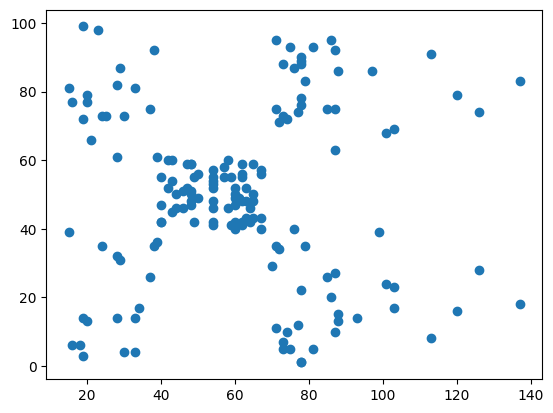

In [ ]:
plt.scatter(X_train[:, -2], X_train[:, -1])

### Example 2

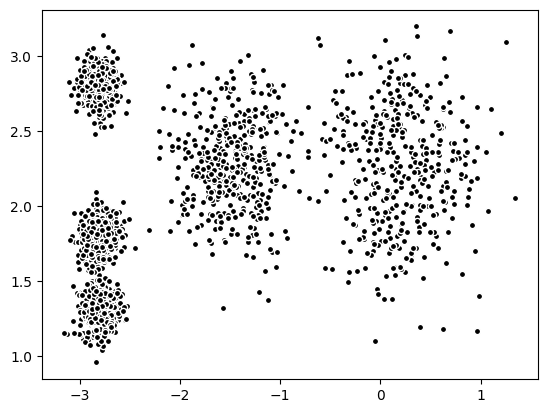

In [ ]:
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X2, y2 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(X2[:, 0], X2[:, 1], s=20, c='black', edgecolor='white')

### Example 3

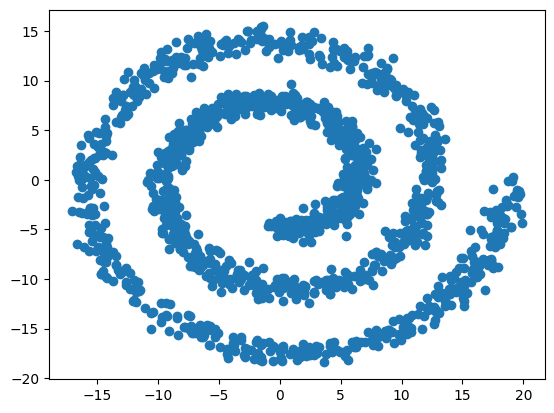

In [ ]:
n_samples = 1500
np.random.seed(0)

t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X3 = np.concatenate((x, y))
X3 += 0.7 * np.random.randn(2, n_samples)
X3 = X3.T

plt.scatter(X3[:, 0], X3[:, 1])

### Example 4

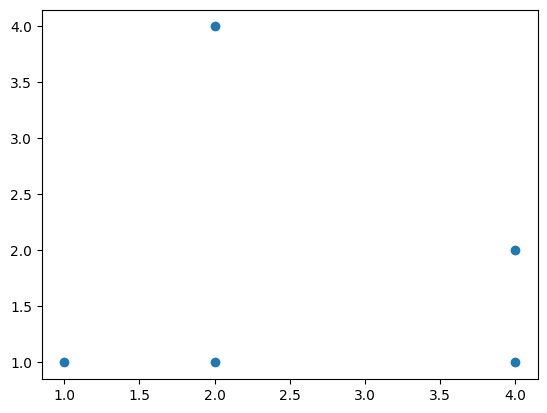

In [ ]:
X4 = np.array([[1, 1], [2, 4], [2, 1], [4, 1], [4, 2]])

plt.scatter(X4[:, 0], X4[:, 1])

## **🔸 K-means**

### sklearn

In [ ]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

<font color='#EE15D'>**Question1: Import Kmeans, Consider 3 different numbers of clusters: 2, 3, and 5 on X dataset. Finally, visualize the results and compare the plots.**

In [ ]:
n = 5  #numbers of clusters
kmeans = KMeans(n_clusters=n)     #complete this code

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels.shape, centroids.shape

((160,), (5, 2))

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xm = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Xm = Xm.reshape(xx.shape)

Text(0, 0.5, 'spending_score')

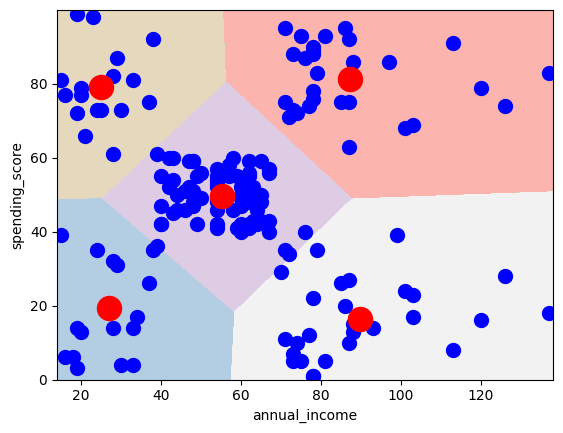

In [ ]:
plt.contourf(xx, yy, Xm, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], s=100, c='blue')
plt.scatter(centroids[: , 0], centroids[: , 1], s=300, c='red')

plt.xlabel(cols[idx[0]])
plt.ylabel(cols[idx[1]])

For n=2 and n=3 the clusters become very scattered which is to be expected with low number of clusters. For n=5 the cluster are tighter for the most part although some clusters are still a bit scattered. Outside of the central tightest cluster for n=5 the data seems to contain a lot of outliers so it's quesitonable if further increasing n would prove useful.

## **🔸 Elbow & Silhouette**

<font color='#EE15D'> **Question2: Elbow: Write code to compute and plot the elbow curve for the X dataset. Your final plot should match the provided output. Determine where the elbow point is.**

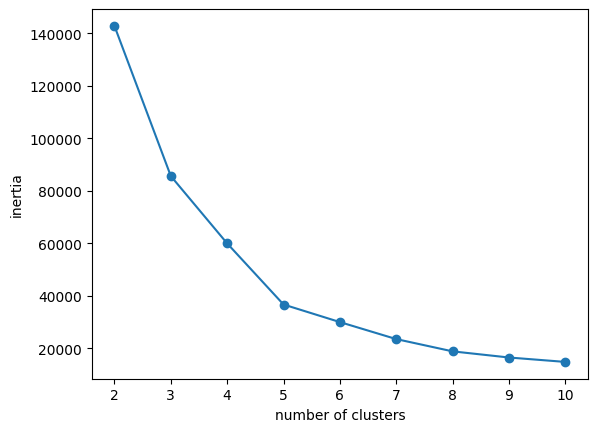

In [ ]:
#Do it here
wcss = []
K = range(2,11)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init=20)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(K, wcss, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

The elbow point is at 5 since that's where the wcss becomes more linear/ this is what to me looks like the elbow joint.

### Silhouette score

<font color='#EE15D'> **Question3: Calculate sillhoutte score**

In [ ]:
#Do it here
model = KMeans(n_clusters=2, n_init=20)
model.fit(X)
labels = model.labels_
score = silhouette_score(X, labels)
print(score)


0.4040736334137989


## **🔸 Hierarchical Clustering**

### Example 1

<font color='#EE15D'> **Question4: Use AgglomerativeClustering of Sklearn with 5 clusters, fit on X2 data and plot it. You just need to complete agg code line**

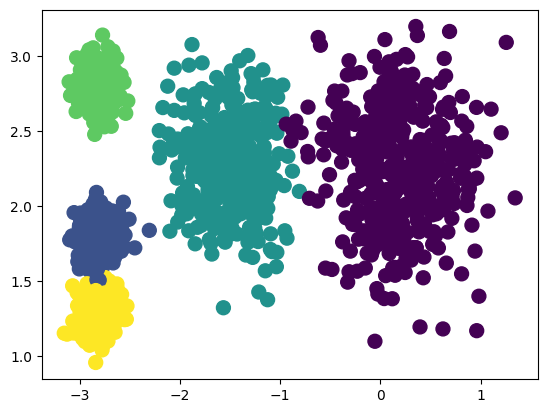

In [ ]:
agg = AgglomerativeClustering(n_clusters=5)   #complete this code
agg.fit(X2)

labels = agg.labels_


plt.scatter(X2[:, 0], X2[:, 1], s=100, c=labels);

### Example 2

<font color='#EE15D'> **Question5: Apply AgglomerativeClustering on X data with 5 clusters, switch linkage between 'ward', 'single', and 'complete' and compare the plotts. Which is a better method?**

In [ ]:
cols = ['gender', 'age', 'annual_income', 'spending_score']
idx = [2, 3]
X = X_train[:, idx].copy()

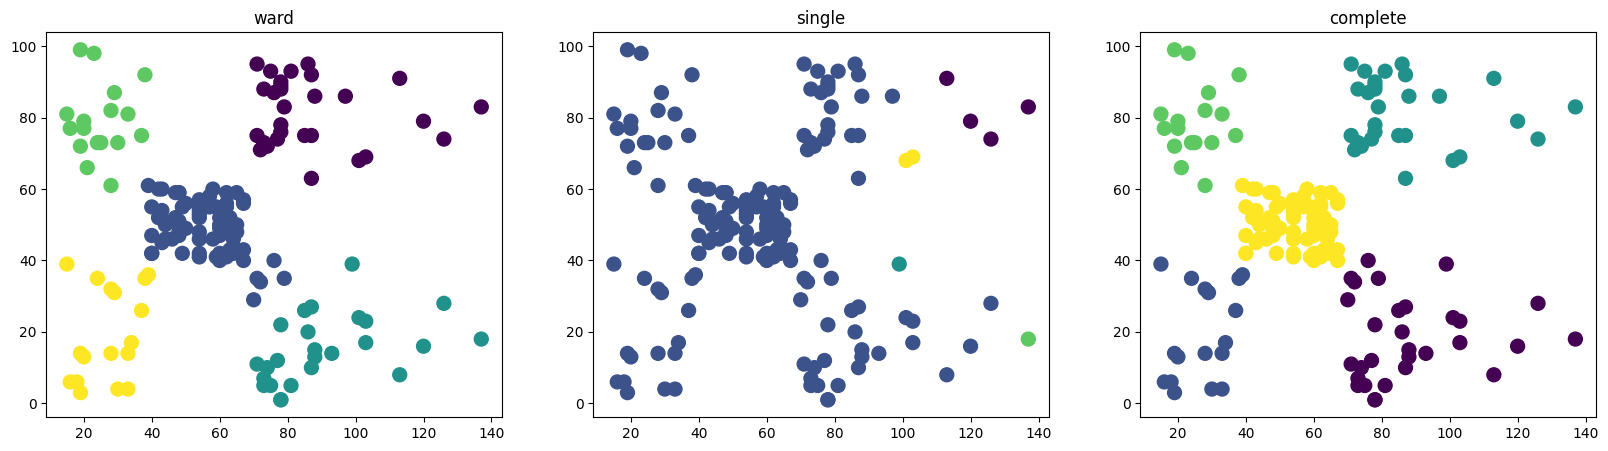

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

agg = AgglomerativeClustering(n_clusters=5, linkage='ward')   #complete this code
agg.fit(X)

ward_labels = agg.labels_

axes[0].scatter(X[:, 0], X[:, 1], s=100, c=ward_labels)
axes[0].set_title('ward')

#single
agg = AgglomerativeClustering(n_clusters=5, linkage='single')   #complete this code
agg.fit(X)

single_labels = agg.labels_

axes[1].scatter(X[:, 0], X[:, 1], s=100, c=single_labels)
axes[1].set_title('single')

#complete
agg = AgglomerativeClustering(n_clusters=5, linkage='complete')   #complete this code
agg.fit(X)

comp_labels = agg.labels_

axes[2].scatter(X[:, 0], X[:, 1], s=100, c=comp_labels)
axes[2].set_title('complete')

plt.show()

Using single linkage yields the worst results as there is one massive group and 4 very small groups. Ward and Complete yields very similair results though, I would argue that complete has better seperation as it yields a more clean seperation.

### Example 3

<font color='#EE15D'> **Question6: Apply AgglomerativeClustering on X3 data with 4 clusters, and linkage = 'ward', finally visualize it**

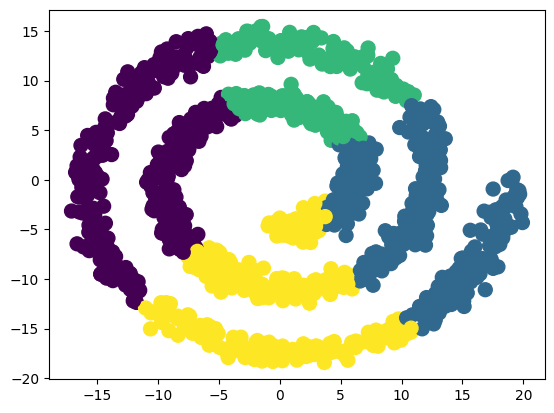

In [ ]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')  #complete this code
agg.fit(X3)

labels = agg.labels_


plt.scatter(X3[:, 0], X3[:, 1], s=100, c=labels);

### Dendrogram (Optional, Extra point)

For extra points, you can plot a dendrogram using Agglomerative Clustering on the X4 dataset by applying the function provided in the following link.

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

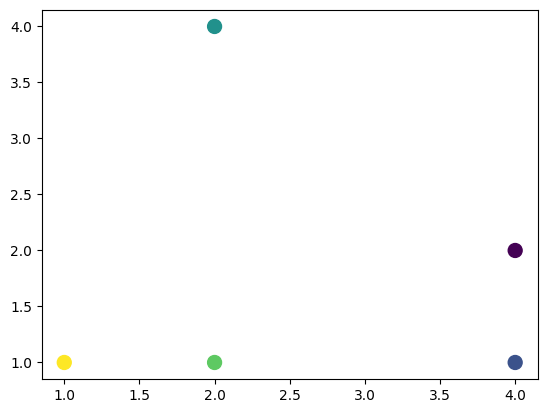

In [ ]:
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)  #complete this code
agg.fit(X4)

labels = agg.labels_

plt.scatter(X4[:, 0], X4[:, 1], s=100, c=labels);

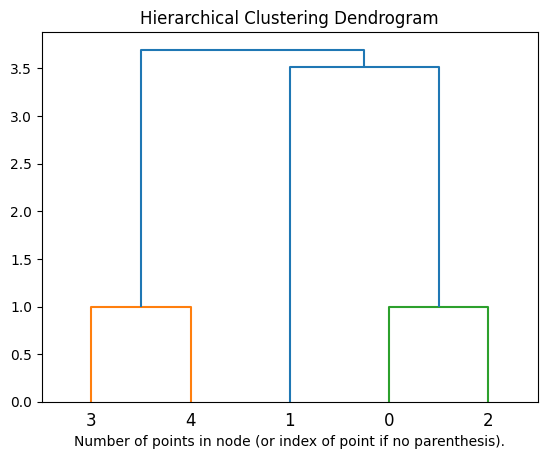

In [ ]:
#Do plotting Dendogram here

#...........................................                         #complete this
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()